# X-ray reconstruction of a lotus root filled with various elements.

### Instructions to run this notebook

Download LotusData128.mat from [here](https://zenodo.org/record/1254204) and place it in a folder called data. Change the name to lotus128.mat. Alternatively, change the path of the file below. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 


#Some code to beautify the plots
plt.rcParams['figure.figsize'] = [10, 5]
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14

In [2]:
# Load dataset 
from scipy.io import loadmat
mat = loadmat('data/lotus128.mat')           #Appropriate path
from scipy.sparse import csr_matrix

b = mat['m']
A = mat['A']

In [3]:
m,n = A.shape
print A.shape, A.nnz, m*n

(51480, 16384) 12533230 843448320


### What does the data look like?

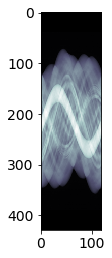

In [4]:
plt.figure()
plt.imshow(b, cmap = 'bone')

### Solution using Tikhonov regularization

In [9]:
from scipy.sparse.linalg import aslinearoperator, LinearOperator

l2 = 100.         #Regularization parameter

# simulate measurement error
bk = b.flatten(order = 'F')

Am = aslinearoperator(A)
Atb =  Am.rmatvec(bk)


Ax = lambda x: Am.rmatvec(Am.matvec(x)) + l2*x

In [10]:
from scipy.sparse.linalg import cg

n = A.shape[1]
Aop = LinearOperator((n,n), matvec = Ax)
x, info = cg(Aop, Atb, tol = 1.e-7, maxiter = 100)

## Plot the reconstruction

Text(0.5,1,'Reconstruction')

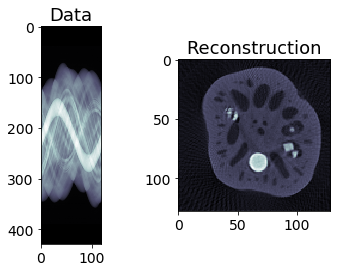

In [11]:
f, (ax1, ax2) = plt.subplots(1,2)
ax1.imshow(b, cmap = 'bone')
ax1.set_title('Data', fontsize = 18)

N = int(np.sqrt(A.shape[1]))
ax2.imshow(x.reshape(N,N).T, cmap = 'bone')
ax2.set_title('Reconstruction', fontsize = 18)